100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:13<00:00,  1.34s/it]


[[-0.42320236  0.19097504 -0.14588903  0.33813461 -0.21204107  0.56528021
  -0.44537758 -0.09169276  0.21798654  0.16980147  0.19524869  0.00226123
  -0.0778474   0.33881857  0.02215503]]
-0.8505912797715787


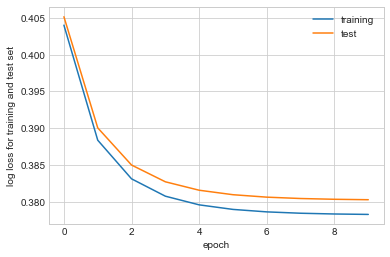

In [3]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import math
import matplotlib.pyplot as plt
from tqdm import tqdm
X, y = make_classification(n_samples=50000, n_features=15, n_informative=10, n_redundant=5,
                           n_classes=2, weights=[0.7], class_sep=0.7, random_state=15)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)
w = np.zeros_like(X_train[0]).reshape(1,len(X_train[0]))
b = 0
eta0  = 0.0001
alpha = 0.0001
log_losstrain=0
log_losstru=[]
log_losstest=0
log_lossteu=[]
epochs =[]
for j in tqdm(range(10)):
    s = 0;t = 0
    for i in range(len(X_train)):
           w1 =(1-((eta0*alpha)/len(X_train)))*w + (eta0*X_train[i,:])*(y_train[i]-(1/(1+math.exp(-1*(np.dot(w,X_train[i,:])+b)))))
           b1 = b + eta0*(y_train[i]-(1/(1+math.exp(-1*(np.dot(w,X_train[i,:])+b)))))
           w=w1
           b=b1
    for k in range(len(X_train)):
        s += (-y_train[k]*(math.log(1/(1+math.exp(-1*(np.dot(w,X_train[k,:])+b))))))-((1-y_train[k])*(math.log(1-(1/(1+math.exp(-1*(np.dot(w,X_train[k,:])+b))))))) 
    log_losstru.append(s/len(X_train))
    for k in range(len(X_test)):  
        t += (-y_test[k]*(math.log(1/(1+math.exp(-1*(np.dot(w,X_test[k,:])+b))))))-((1-y_test[k])*(math.log(1-(1/(1+math.exp(-1*(np.dot(w,X_test[k,:])+b)))))))
    log_lossteu.append(t/len(X_test)) 
    epochs.append(j)
print(w)
print(b)
plt.xlabel('epoch')
plt.ylabel('log loss for training and test set')
plt.style.use('seaborn-whitegrid')
plt.plot(epochs,log_losstru,linestyle='solid',label = 'training')
plt.plot(epochs,log_lossteu,linestyle='solid',label = 'test')
plt.legend(loc ='best')
plt.show()

Observation:
Log loss is lower in training as compared to test data set. 

In [4]:
from sklearn import linear_model
clf = linear_model.SGDClassifier(eta0=0.0001, alpha=0.0001, loss='log', random_state=15, penalty='l2', tol=1e-3, verbose=2, learning_rate='constant')
clf.fit(X=X_train, y=y_train)
clf.coef_, clf.coef_.shape, clf.intercept_

-- Epoch 1
Norm: 0.77, NNZs: 15, Bias: -0.316653, T: 37500, Avg. loss: 0.455552
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 0.91, NNZs: 15, Bias: -0.472747, T: 75000, Avg. loss: 0.394686
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 0.98, NNZs: 15, Bias: -0.580082, T: 112500, Avg. loss: 0.385711
Total training time: 0.04 seconds.
-- Epoch 4
Norm: 1.02, NNZs: 15, Bias: -0.658292, T: 150000, Avg. loss: 0.382083
Total training time: 0.05 seconds.
-- Epoch 5
Norm: 1.04, NNZs: 15, Bias: -0.719528, T: 187500, Avg. loss: 0.380486
Total training time: 0.06 seconds.
-- Epoch 6
Norm: 1.05, NNZs: 15, Bias: -0.763409, T: 225000, Avg. loss: 0.379578
Total training time: 0.08 seconds.
-- Epoch 7
Norm: 1.06, NNZs: 15, Bias: -0.795106, T: 262500, Avg. loss: 0.379150
Total training time: 0.09 seconds.
-- Epoch 8
Norm: 1.06, NNZs: 15, Bias: -0.819925, T: 300000, Avg. loss: 0.378856
Total training time: 0.10 seconds.
-- Epoch 9
Norm: 1.07, NNZs: 15, Bias: -0.837805, T: 337500, Avg. loss: 0.

(array([[-0.42336692,  0.18547565, -0.14859036,  0.34144407, -0.2081867 ,
          0.56016579, -0.45242483, -0.09408813,  0.2092732 ,  0.18084126,
          0.19705191,  0.00421916, -0.0796037 ,  0.33852802,  0.02266721]]),
 (1, 15),
 array([-0.8531383]))

In [5]:
b-clf.intercept_,w-clf.coef_

(array([0.00254702]),
 array([[ 0.00016455,  0.00549939,  0.00270133, -0.00330946, -0.00385437,
          0.00511442,  0.00704724,  0.00239537,  0.00871335, -0.01103979,
         -0.00180322, -0.00195793,  0.0017563 ,  0.00029055, -0.00051218]]))

Observation: Difference is under 10^-3